In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [2]:
(X_train, y_train), (X_test,y_test) = datasets.cifar10.load_data()
X_train.shape

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step


(50000, 32, 32, 3)

In [3]:
X_test.shape


(10000, 32, 32, 3)

In [4]:
y_train.shape

(50000, 1)

In [5]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [6]:
y_train = y_train.reshape(-1,)
y_train[:5]


array([6, 9, 9, 4, 1], dtype=uint8)

In [7]:
y_test = y_test.reshape(-1,)

In [8]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [9]:
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

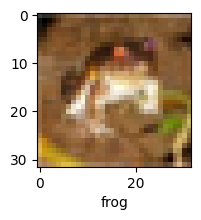

In [10]:
plot_sample(X_train, y_train, 0)

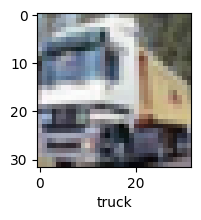

In [11]:
plot_sample(X_train, y_train, 1)

In [12]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [13]:
ann = models.Sequential([
        layers.Flatten(input_shape=(32,32,3)),
        layers.Dense(3000, activation='relu'),
        layers.Dense(1000, activation='relu'),
        layers.Dense(10, activation='softmax')
    ])

ann.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

ann.fit(X_train, y_train, epochs=5)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 150s 96ms/step - accuracy: 0.3061 - loss: 1.9266
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 197s 92ms/step - accuracy: 0.4221 - loss: 1.6415
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 205s 95ms/step - accuracy: 0.4553 - loss: 1.5457
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 146s 93ms/step - accuracy: 0.4721 - loss: 1.4901
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 143s 91ms/step - accuracy: 0.4928 - loss: 1.4411


In [14]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

313/313 ━━━━━━━━━━━━━━━━━━━━ 10s 30ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.53      0.49      0.51      1000
           1       0.54      0.67      0.60      1000
           2       0.47      0.15      0.23      1000
           3       0.41      0.24      0.31      1000
           4       0.32      0.64      0.42      1000
           5       0.48      0.30      0.37      1000
           6       0.54      0.48      0.51      1000
           7       0.64      0.44      0.52      1000
           8       0.44      0.79      0.56      1000
           9       0.52      0.48      0.50      1000

    accuracy                           0.47     10000
   macro avg       0.49      0.47      0.45     10000
weighted avg       0.49      0.47      0.45     10000



In [15]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [16]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [17]:
cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 70s 43ms/step - accuracy: 0.3791 - loss: 1.7015
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 68s 43ms/step - accuracy: 0.5892 - loss: 1.1678
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 88s 47ms/step - accuracy: 0.6522 - loss: 0.9908
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 79s 45ms/step - accuracy: 0.6910 - loss: 0.8971
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 69s 44ms/step - accuracy: 0.7147 - loss: 0.8201
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 44ms/step - accuracy: 0.7387 - loss: 0.7594
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 81s 44ms/step - accuracy: 0.7521 - loss: 0.7058
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 83s 44ms/step - accuracy: 0.7695 - loss: 0.6600
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 83s 45ms/step - accuracy: 0.7811 - loss: 0.6289
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 80s 43ms/step - accuracy: 0.7957 - loss: 0.5870


In [18]:
cnn.evaluate(X_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.7032 - loss: 0.8906


[0.9241688251495361, 0.6937000155448914]

In [19]:
y_pred = cnn.predict(X_test)
y_pred[:5]

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step


array([[4.0457104e-03, 3.4145385e-04, 1.4873647e-02, 8.5843343e-01,
        3.2197192e-04, 8.9787699e-02, 1.2788461e-02, 7.5648440e-04,
        1.8570278e-02, 8.0881960e-05],
       [2.5499432e-04, 6.2685931e-01, 4.2365085e-07, 7.6097876e-08,
        6.9486610e-08, 2.8792927e-08, 4.0835477e-10, 2.3491475e-10,
        3.7175125e-01, 1.1339362e-03],
       [1.0433255e-01, 4.7139046e-01, 5.8863149e-03, 2.0832547e-04,
        6.7596755e-04, 5.9285332e-05, 1.8469591e-04, 1.4321620e-04,
        3.2496113e-01, 9.2158057e-02],
       [1.3517800e-01, 5.6609680e-04, 1.8637039e-02, 6.6142849e-05,
        6.1624940e-03, 9.8439232e-06, 7.6466633e-05, 1.5009553e-04,
        8.3910042e-01, 5.3293192e-05],
       [8.4202824e-08, 3.0199220e-04, 6.8298683e-02, 6.7091105e-03,
        1.9187301e-01, 1.0038160e-04, 7.3269498e-01, 1.2858258e-05,
        7.2403404e-06, 1.6402628e-06]], dtype=float32)

In [20]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[np.int64(3), np.int64(1), np.int64(1), np.int64(8), np.int64(6)]

In [21]:
y_test[:5]



array([3, 8, 8, 0, 6], dtype=uint8)

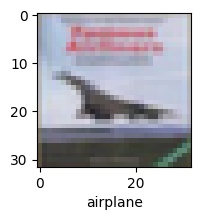

In [22]:
plot_sample(X_test, y_test,3)

In [23]:
classes[y_classes[3]]

'ship'

In [24]:
classes[y_classes[3]]

'ship'

In [25]:
pip install gradio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.1/54.1 MB 12.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 323.1/323.1 kB 21.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.2/95.2 kB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 100.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 kB 4.8 MB/s eta 0:00:00


In [26]:
pip install grad-cam opencv-python matplotlib


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 40.6 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 84.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 62.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 45.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 858.3 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 9.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 73.8 MB/s e

In [27]:
from pytorch_grad_cam import GradCAM
from pytorch_grad_cam.utils.image import show_cam_on_image, preprocess_image
from torchvision import transforms
import numpy as np
import cv2

# Function to get Grad-CAM overlay
def get_gradcam(input_image, model, target_layer):
    transform = transforms.Compose([
        transforms.Resize((224, 224)),  # adjust to model's input
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406],
                             [0.229, 0.224, 0.225])
    ])

    img_tensor = transform(input_image).unsqueeze(0)
    cam = GradCAM(model=model, target_layers=[target_layer], use_cuda=torch.cuda.is_available())
    grayscale_cam = cam(input_tensor=img_tensor)[0]

    img_np = np.array(input_image.resize((224, 224))) / 255.0
    cam_image = show_cam_on_image(img_np.astype(np.float32), grayscale_cam, use_rgb=True)
    return Image.fromarray(cam_image)

In [28]:
import cv2
import numpy as np

def is_blurry(image, threshold=100):
    img_cv = np.array(image.convert("L"))
    variance = cv2.Laplacian(img_cv, cv2.CV_64F).var()
    return variance < threshold, variance

In [31]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import numpy as np
import gradio as gr
from PIL import Image
import cv2

# Load and preprocess CIFAR-10 data
(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()
y_train = y_train.reshape(-1,)
y_test = y_test.reshape(-1,)
X_train = X_train / 255.0
X_test = X_test / 255.0

# Class labels
classes = ["airplane", "automobile", "bird", "cat", "deer",
           "dog", "frog", "horse", "ship", "truck"]

# Build model
cnn = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

cnn.compile(optimizer='adam',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])

# Load weights if available (else train)
try:
    cnn.load_weights("cnn_cifar10.h5")
except:
    cnn.fit(X_train, y_train, epochs=10)
    cnn.save_weights("cnn_cifar10.h5")

# Image blur detection function
def is_blurry(image):
    image_gray = cv2.cvtColor(np.array(image), cv2.COLOR_RGB2GRAY)
    lap_var = cv2.Laplacian(image_gray, cv2.CV_64F).var()
    return lap_var < 100  # lower = blurrier

# Prediction function
def predict_with_feedback(image):
    warning = ""

    # Resize and normalize
    img = image.resize((32, 32))
    img_array = np.array(img) / 255.0

    if img_array.shape != (32, 32, 3):
        return "Error", 0.0, "Image must be 32x32 RGB."

    # Check for blur
    if is_blurry(image):
        warning += "Warning: Image appears blurry. "

    # Predict
    img_array = np.expand_dims(img_array, axis=0)
    preds = cnn.predict(img_array)[0]
    pred_index = np.argmax(preds)
    confidence = float(preds[pred_index])
    label = classes[pred_index]

    if confidence < 0.6:
        warning += "Low confidence in prediction. Try a clearer image."

    return label, confidence, warning

# Gradio interface
demo = gr.Interface(
    fn=predict_with_feedback,
    inputs=gr.Image(type="pil"),
    outputs=[
        gr.Textbox(label="Prediction"),
        gr.Number(label="Confidence"),
        gr.Textbox(label="Warnings")
    ],
    title="CNN Image Classifier with Feedback"
)

demo.launch()


It looks like you are running Gradio on a hosted a Jupyter notebook. For the Gradio app to work, sharing must be enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://a40106d42795ba4586.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


In [30]:
# Save model
cnn.save("cnn_cifar10.h5")

# Load model
cnn = models.load_model("cnn_cifar10.h5")
